Using Naive bayes classfier to predict the likelihood that the pregnant women enlisted may suffer from diabetes

In [10]:
#importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [11]:
#importing the data to be trained and tested

diabetes = pd.read_csv('diabetes.csv')

In [13]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
diabetes.columns = ['preg', 'plasma', 'BP', 'Skin', 'ins', 'BMI', 'pedi', 'Age', 'Class']

In [15]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg      768 non-null int64
plasma    768 non-null int64
BP        768 non-null int64
Skin      768 non-null int64
ins       768 non-null int64
BMI       768 non-null float64
pedi      768 non-null float64
Age       768 non-null int64
Class     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


diabetes.info() - suggests that all of the 768 entries are numeric and none, string 

Checking to see if the data consists of missing values

In [16]:
diabetes.isnull().sum()

preg      0
plasma    0
BP        0
Skin      0
ins       0
BMI       0
pedi      0
Age       0
Class     0
dtype: int64

The result above suggests that the dataframe does not have missing values

Checking the number of Zeroes in each of the features

In [17]:
diabetes.apply( lambda s : s.value_counts().get(0,0), axis=0)

preg      111
plasma      5
BP         35
Skin      227
ins       374
BMI        11
pedi        0
Age         0
Class     500
dtype: int64

Observation :

> 14.15 % of the women have never been pregnant , but this feature can be 0 as it is possible for a woman to not have ever been pregnant

> Age does not have any 0 values.
> For the rest of the data it is uncommon for the data  to be 0.

>30% of the skin thickness values are 0

>49% of the BMI values are 0

In [18]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plasma,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
ins,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


A visual representation of the table presented above.


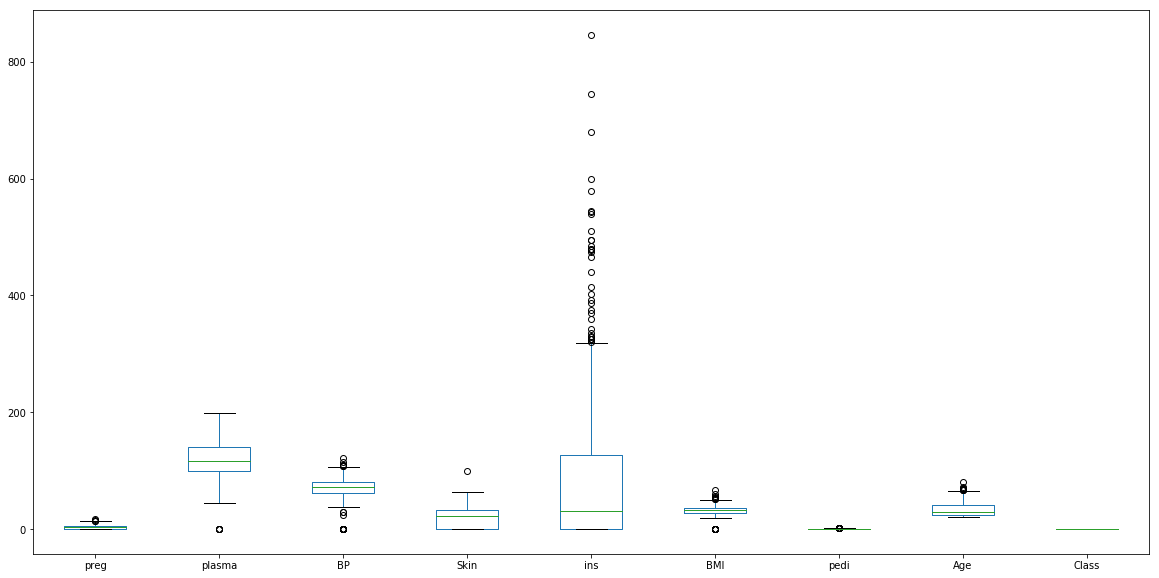

In [19]:
diabetes.plot(kind = 'box', figsize = (20, 10))

C:\Users\kamalashree\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


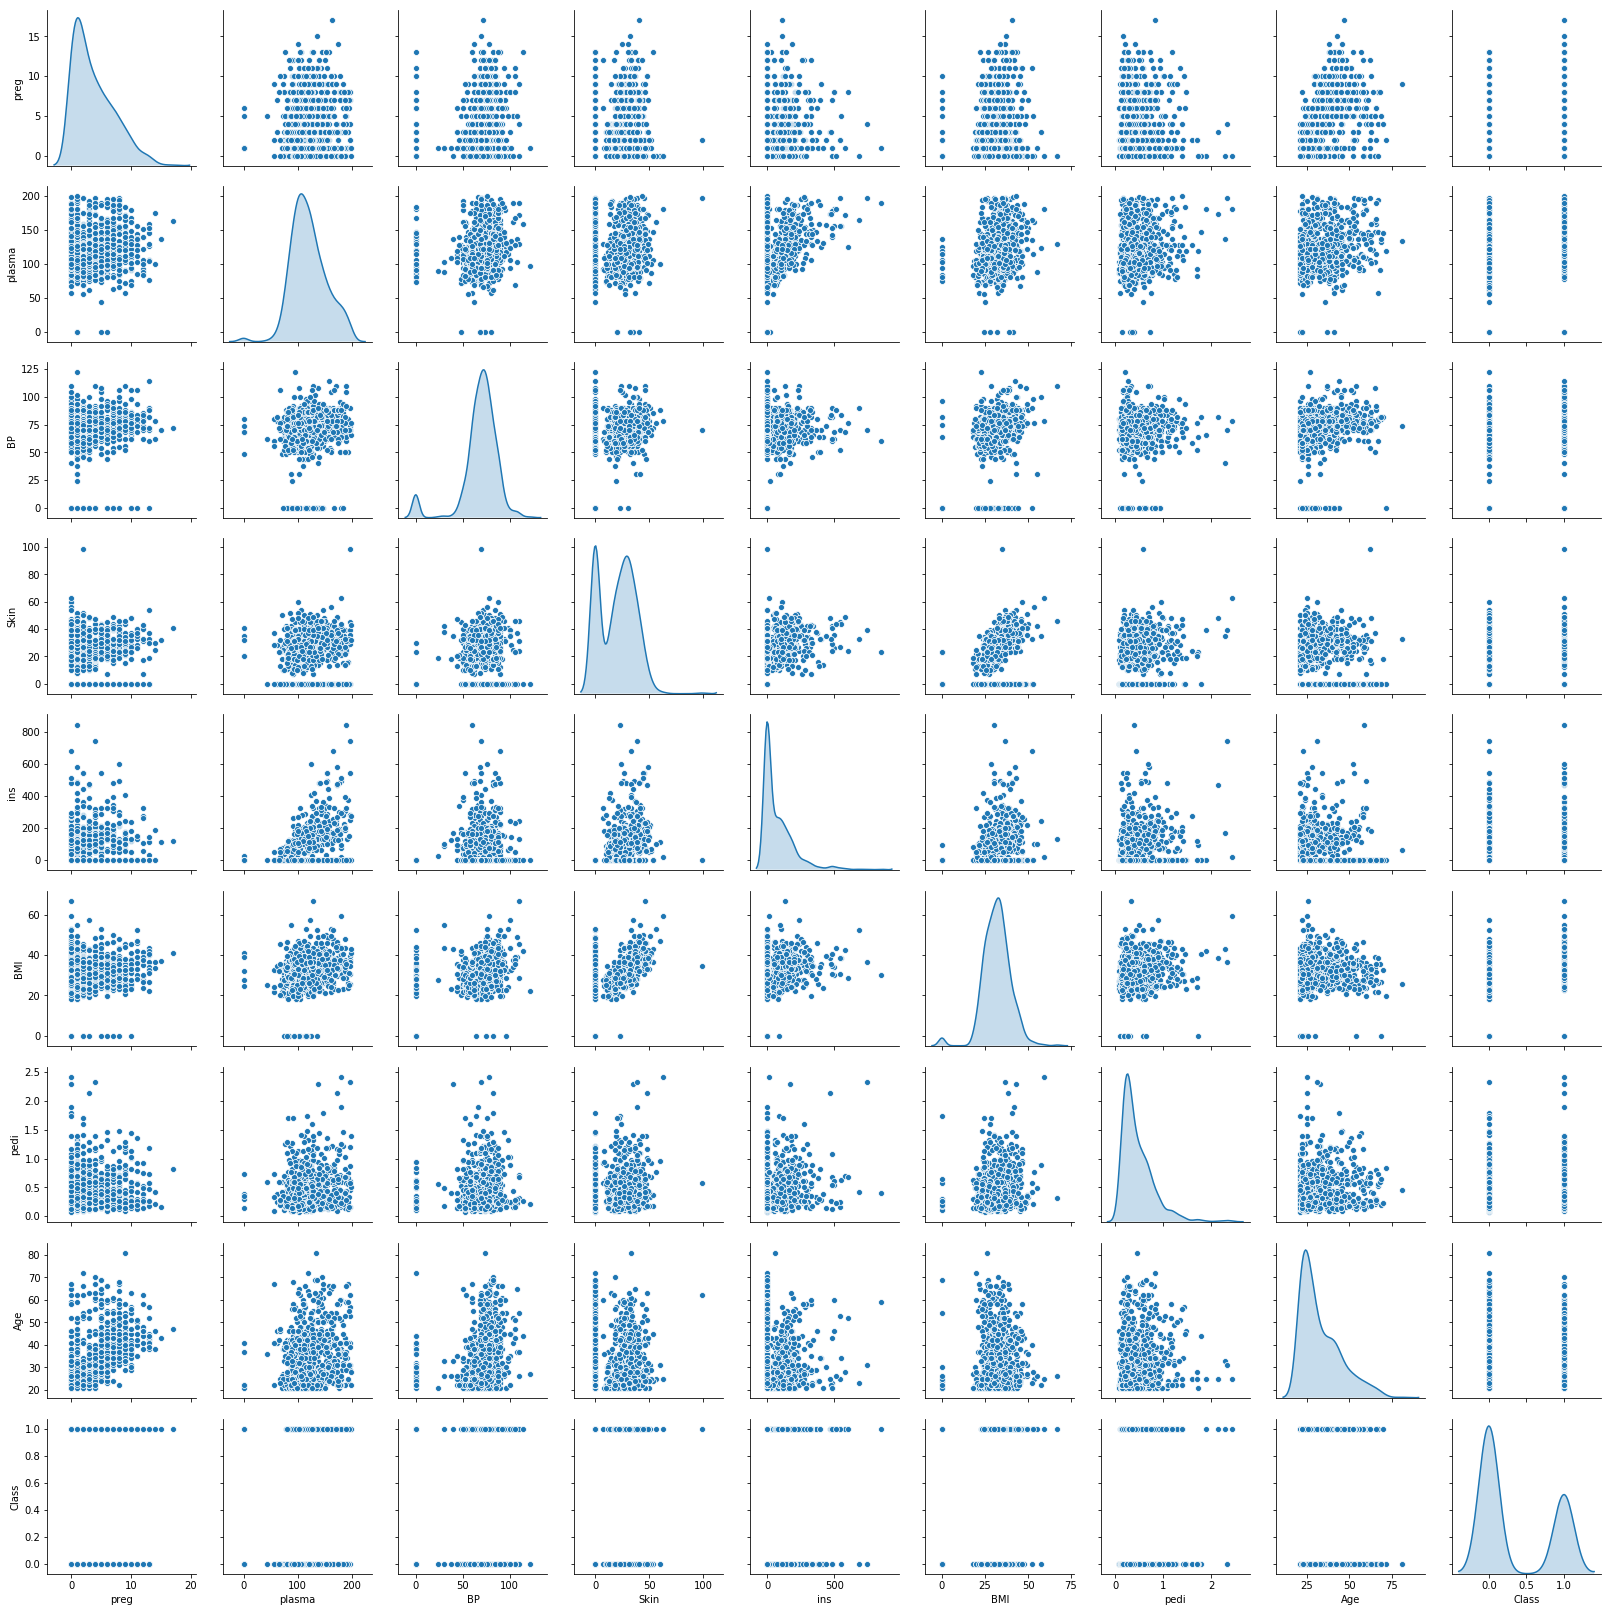

In [20]:
sns.pairplot(diabetes, diag_kind = 'kde')

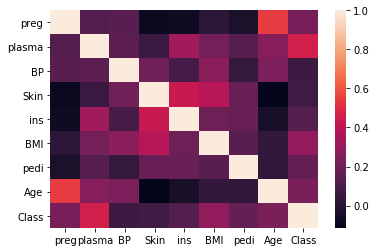

In [21]:
corr = diabetes.corr(method = 'pearson')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Bayes classifier algorithm assumes that all the features are independent i.e., not correlated.

going by the matrix and the pairplot seen above:
>Pregnancy and age ; plasma and insulin; skin and insulin show correlation on some level and are not completely independent.

In [22]:
diabetes['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

Observation :

> there is a difference between the patients classified to be non-diabetic and diabetic.

>Class imbalance hinders the training of the model causing thus resulting in low precision rates

> SMOTE( Synthetic Minority Over-Sampling Technique) will be used to over sample the minority values, in this case the class '1' i.e.,classified as diabetic.

>Thus creating synthetic minority values to bring to equality with the number of the majority values, in this case class '0' (classified as non- diabetic)

Moving on to split the data :
First, into independent and dependent arrays
second, train and test datas going to be used respectively for training and testing the model.

In [23]:
array = diabetes.values

In [24]:
X = array[:,0:8] # excluding feature 'class' i.e., independent features

In [25]:
Y = array[:,8]  # including only feature 'class' i.e., dependant feature

In [26]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1) # dividing the data set to : training data = 70% and testing data = 30%

SMOTE will be applied on the training dataset.
training with equality in the number of classes improves recall rate.

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
print(len(Y_train[Y_train==1]))
print(len(Y_train[Y_train==0]))   # results in an imbalance in the values of classes 1 and 0

183
354


In [29]:
bal = SMOTE()

In [30]:
X_train, Y_train = bal.fit_sample(X_train, Y_train) # SMOTE being fit on the training values of X and Y

In [31]:
print(len(Y_train[Y_train==1]))

354


In [32]:
print(len(Y_train[Y_train==0]))

354


As observed, Classes 1 and 0 are equal in number now i.e., classes are now balanced, Class 0 has now been over sampled to match values of Class 1

This project will use Gaussian Naive bayes classifier, one of the classification algorithms based on Baye's Theorem

In [33]:
model = GaussianNB()

In [34]:
model.fit(X_train, Y_train) # providing the training dataset to the model

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
expected = Y_test #the expected output for Y

In [36]:
predicted = model.predict(X_test) # the predicted values for Y using values of X_test

In [37]:
print(pd.DataFrame(metrics.confusion_matrix(expected,predicted), index = ['true :-ve', 'true:+ve'], columns = ['pred : no', 'pred : yes']))

           pred : no  pred : yes
true :-ve        119          27
true:+ve          26          59


The confusion matrix depicts that the 80% of the time the patient without diabetes is predicted correctly 

70% of the time patient with diabetes is predicted right.

In [38]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       146
         1.0       0.69      0.69      0.69        85

   micro avg       0.77      0.77      0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



In [39]:
from sklearn.metrics import roc_curve, auc

In [40]:
fpr,tpr,threshold = roc_curve(expected,predicted)

In [41]:
fpr

array([0.        , 0.18493151, 1.        ])

In [42]:
tpr

array([0.        , 0.69411765, 1.        ])

In [43]:
auc(fpr,tpr)

0.7545930701047543

Conclusions :

> Naive Bayes assumes complete independence between the features, that which is not completely true in this dataset, certain features have some correlation , althought not very high.

>The model has been trained on balanced training data and tested on an unbalanced test data.

> The resulting AUC is 0.75, in terms of AUC it has a fair accuracy level.

>But, in medical terms AUC is expected to be near perfect about 0.99, in whose comaprison 0.75 is only average.